In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据

In [2]:
import pickle
with open('data.pkl', 'rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,0,2/3/2018 22:56,Standard Class,Cally Holloway,2018,1,2,22,2018-01,314.640015
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,0,1/18/2018 12:27,Standard Class,Irene Luna,2018,1,5,12,2018-01,311.359985
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,0,1/17/2018 12:06,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,309.720001
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,0,1/16/2018 11:45,Standard Class,Tana Tate,2018,1,5,11,2018-01,304.809998
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,0,1/15/2018 11:24,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,298.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,0,1/20/2016 3:40,Standard Class,Maria Peterson,2016,1,5,3,2016-01,399.980011
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,0,1/19/2016 1:34,Second Class,Ronald Clark,2016,1,5,1,2016-01,395.980011
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,0,1/20/2016 21:00,Standard Class,John Smith,2016,1,4,21,2016-01,391.980011
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,0,1/18/2016 20:18,Standard Class,Mary Smith,2016,1,4,20,2016-01,387.980011


# 建立模型

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [38]:
from xgboost import XGBRegressor

In [6]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['Delivery Status'].value_counts()
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

In [7]:
pd.set_option('display.max_columns', None) # 显示所有列
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,Cally Holloway,2018,1,2,22,2018-01,314.640015,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,Irene Luna,2018,1,5,12,2018-01,311.359985,0,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,309.720001,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,Tana Tate,2018,1,5,11,2018-01,304.809998,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,298.250000,0,0


In [8]:
# 删除没用的列
train_data.drop(['Customer Email','Product Image','Customer Password',
                 'Customer Fname','Customer Lname','Order Status','Delivery Status'],axis=1,inplace=True )

In [9]:
# 删除不重要的字段
train_data.drop(['Order Zipcode', 'Product Description','Customer Full Name'],axis = 1, inplace=True)
train_data.drop(['Latitude','Longitude','Customer Street','Product Status','Product Status','Order Item Id','Product Card Id','Order Customer Id'],axis = 1, inplace=True)
train_data.drop(['shipping date (DateOrders)','order date (DateOrders)','order_month_year'],axis = 1, inplace=True)

In [10]:
# 查看变量类型
categorical_cols = train_data.select_dtypes(include='object').columns
numerical_cols = train_data.select_dtypes(exclude='object').columns

In [11]:
le = LabelEncoder()
for column in categorical_cols:
    train_data[column] = le.fit_transform(train_data[column])

**查看特征相关性**

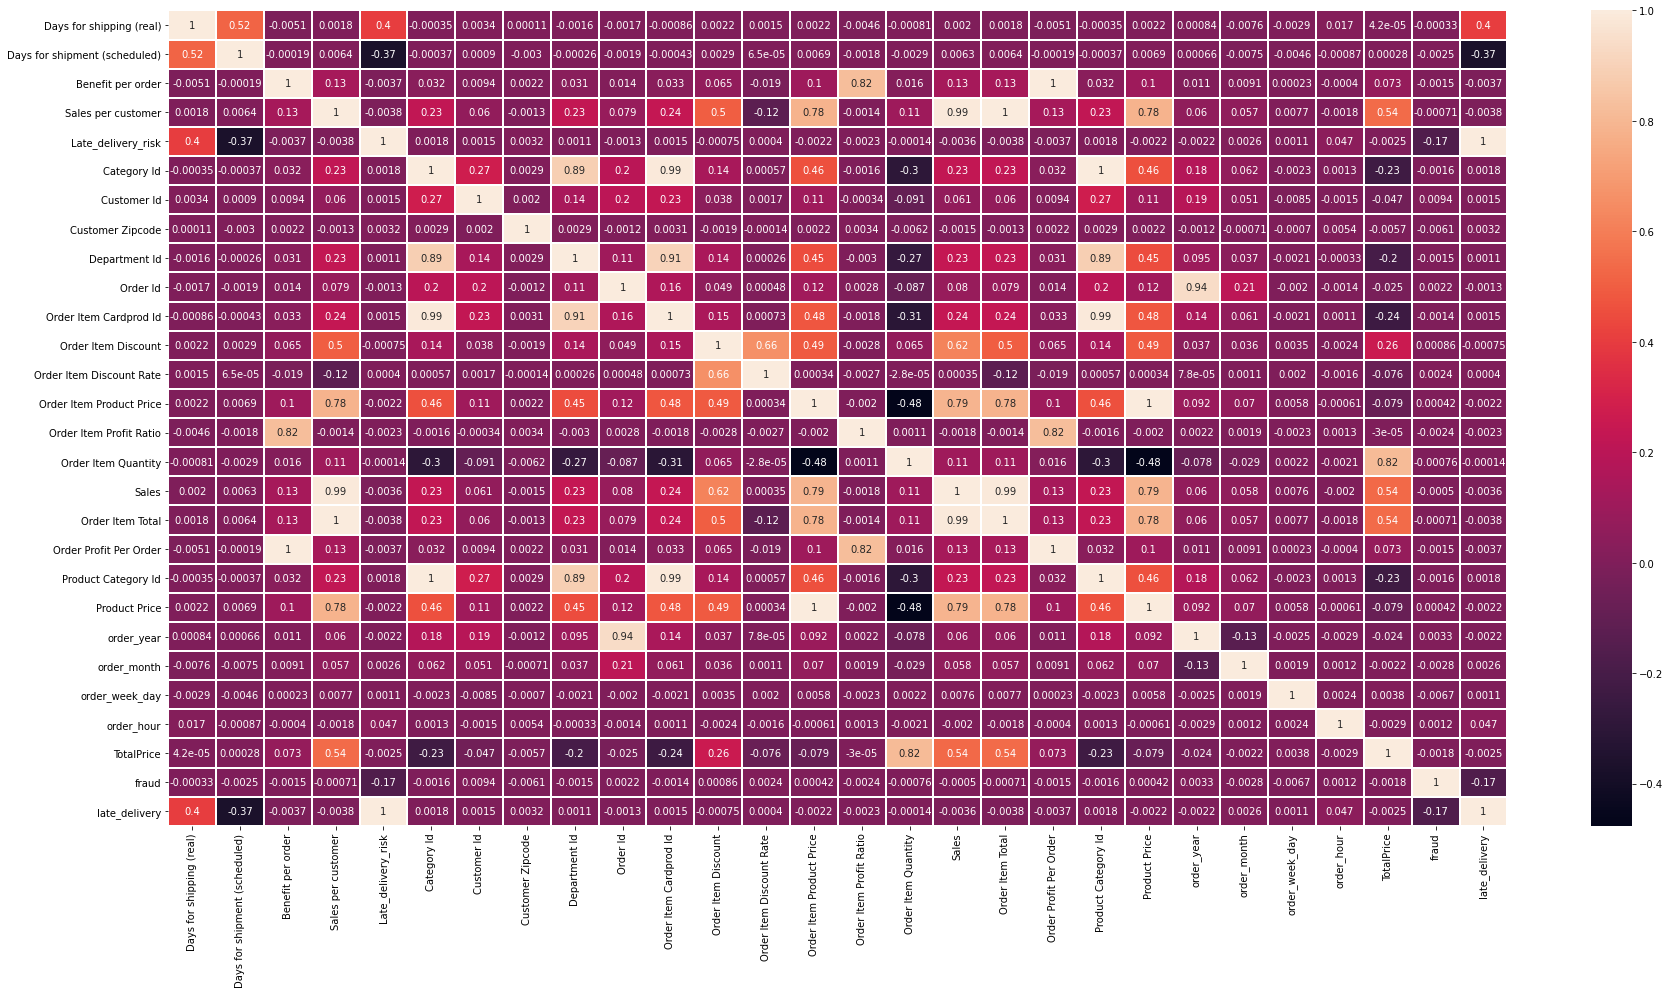

In [12]:
plt.figure(figsize=(30,15))
temp = train_data[numerical_cols]
sns.heatmap(temp.corr(), annot=True, linewidths=1)
plt.show()

In [13]:
# 去掉重复的强相关字段
train_data.drop([ 'Product Category Id','Sales','Order Item Total','Order Item Cardprod Id', 'Product Price','Late_delivery_risk'],axis = 1, inplace=True)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Profit Per Order,Order Region,Order State,Product Name,Shipping Mode,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,91.250000,15,475,78,3,2018,1,2,22,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,-249.089996,13,841,78,3,2018,1,5,12,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,-247.779999,13,841,78,3,2018,1,5,12,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,22.860001,11,835,78,3,2018,1,5,11,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,134.210007,11,835,78,3,2018,1,5,11,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,40.000000,7,913,24,3,2016,1,5,3,399.980011,0,0
180515,1,3,2,-613.770019,395.980011,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,-613.770019,7,770,24,2,2016,1,5,1,395.980011,0,1
180516,3,5,4,141.110001,391.980011,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,141.110001,11,88,24,3,2016,1,4,21,391.980011,0,1
180517,2,3,4,186.229996,387.980011,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,186.229996,11,88,24,3,2016,1,4,20,387.980011,0,0


## 预测欺诈/迟交订单

In [14]:
# 构造model，对是否fraud进行预测
x_fraud = train_data.loc[:, train_data.columns != 'fraud']
y_fraud = train_data['fraud']

In [15]:
# 切分数据集
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)

In [16]:
# 构造model，对是否late_delivery进行预测
x_late = train_data.loc[:, train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']

In [17]:
# 切分数据集
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)

In [18]:
# 标准化
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [19]:
# 对fraud， late_delivery完成评估
def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print('Model used:', model)
    print('{} Accuracy: {}%'.format(name, accuracy*100))
    print('{} Recall: {}%'.format(name, recall*100))
    print('{} Confusion Matrix:\n {}'.format(name, confusion))
    print('{} F1 Score: {}%'.format(name, f1*100))
    return accuracy, recall, f1

**LR**

In [20]:
# 逻辑回归模型
LR_fraud = LogisticRegression()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(LR_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')

Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fraud Accuracy: 97.76756038112121%
Fraud Recall: 20.046893317702228%
Fraud Confusion Matrix:
 [[35127   124]
 [  682   171]]
Fraud F1 Score: 29.790940766550523%


C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
LR_late = LogisticRegression()
acc_late, recall_late, f1_late = model_stats(LR_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Late Delivery Accuracy: 98.7868380234877%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[15705   438]
 [    0 19961]]
Late Delivery F1 Score: 98.91476709613478%


C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**LDA**

In [23]:
# LDA模型
LDA_fraud = LinearDiscriminantAnalysis()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(LDA_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')

Model used: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Fraud Accuracy: 97.85065366718369%
Fraud Recall: 41.38335287221571%
Fraud Confusion Matrix:
 [[34975   276]
 [  500   353]]
Fraud F1 Score: 47.638326585695005%


In [24]:
LDA_late = LinearDiscriminantAnalysis()
acc_late, recall_late, f1_late = model_stats(LDA_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Late Delivery Accuracy: 98.37414136937736%
Late Delivery Recall: 99.45393517358849%
Late Delivery Confusion Matrix:
 [[15665   478]
 [  109 19852]]
Late Delivery F1 Score: 98.54309895510164%


**DT**

In [25]:
# 决策树模型
tree_fraud = DecisionTreeClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(tree_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')

Model used: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Fraud Accuracy: 98.91147795258142%
Fraud Recall: 77.9601406799531%
Fraud Confusion Matrix:
 [[35046   205]
 [  188   665]]
Fraud F1 Score: 77.19094602437609%


In [26]:
tree_late = DecisionTreeClassifier()
acc_late, recall_late, f1_late = model_stats(tree_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Late Delivery Accuracy: 99.22723243961889%
Late Delivery Recall: 99.2735834878012%
Late Delivery Confusion Matrix:
 [[16009   134]
 [  145 19816]]
Late Delivery F1 Score: 99.30094460173886%


**RF**

In [27]:
# 随机森林模型
RF_fraud = RandomForestClassifier()
# 模型训练和评估
acc_fraud, recall_fraud, f1_fraud = model_stats(RF_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')

Model used: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Fraud Accuracy: 98.54586749390648%
Fraud Recall: 39.273153575615474%
Fraud Confusion Matrix:
 [[35244     7]
 [  518   335]]
Fraud F1 Score: 56.06694560669456%


In [28]:
RF_late = RandomForestClassifier()
acc_late, recall_late, f1_late = model_stats(RF_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

Model used: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Late Delivery Accuracy: 98.92255705738975%
Late Delivery Recall: 100.0%
Late Delivery Confusion Matrix:
 [[15754   389]
 [    0 19961]]
Late Delivery F1 Score: 99.03500285281933%


## 销售额/订货数量预测

In [29]:
# 需要对Sales,Quantity 完成回归预测
def regression_model_stats(model, x_train, x_test, y_train, y_test, name='Sales'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse= mean_squared_error(y_test,y_pred, squared=False)
    
    print('Model used:', model)
    print('{} MAE: {}%'.format(name, mae))
    print('{} MSE: {}%'.format(name, mse))
    print('{} RMSE: {}'.format(name, rmse))

    return mae, mse, rmse

In [30]:
x_sales = train_data.loc[:, train_data.columns != 'Sales per customer']
y_sales = train_data['Sales per customer']
# 数据集切分
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)

In [31]:
x_quantity = train_data.loc[:, train_data.columns != 'Order Item Quantity']
y_quantity = train_data['Order Item Quantity']
# 数据集切分
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2)

In [32]:
# 数据规范化
sc = StandardScaler()
x_sales_train = sc.fit_transform(x_sales_train)
x_sales_test = sc.transform(x_sales_test)
x_quantity_train = sc.fit_transform(x_quantity_train)
x_quantity_test = sc.transform(x_quantity_test)

**线性回归**

In [36]:
# 构建线性回归模型
LR_Sales = LinearRegression()
# 模型训练与评估
mae, mse, rmse = regression_model_stats(LR_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')

Model used: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Sales MAE: 10.660126462665538%
Sales MSE: 186.3933516405288%
Sales RMSE: 13.652595051510493


In [37]:
LR_Quantity = LinearRegression()
mae, mse, rmse = regression_model_stats(LR_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Quantity MAE: 0.35253987923222163%
Quantity MSE: 0.28474747218128205%
Quantity RMSE: 0.5336173462147591


In [39]:
# 构建XGB模型
XGB_Sales = XGBRegressor()
# 模型训练与评估
mae, mse, rmse = regression_model_stats(XGB_Sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, 'Sales')

Model used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Sales MAE: 0.19648713895749376%
Sales MSE: 0.24012993409432473%
Sales RMSE: 0.49003054404223084


**xgbssot**

In [40]:
XGB_Quantity = XGBRegressor()
mae, mse, rmse = regression_model_stats(XGB_Sales, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, 'Quantity')

Model used: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Quantity MAE: 0.0005946046093496546%
Quantity MSE: 2.4164252202156634e-05%
Quantity RMSE: 0.004915714821077056
